# Инфраструктура Python. Математика, численные вычисления

## math

In [4]:
import math
print ' '.join(dir(math))

 __doc__ __name__ __package__ acos acosh asin asinh atan atan2 atanh ceil copysign cos cosh degrees e erf erfc exp expm1 fabs factorial floor fmod frexp fsum gamma hypot isinf isnan ldexp lgamma log log10 log1p modf pi pow radians sin sinh sqrt tan tanh trunc


In [397]:
print math.factorial(5), math.gamma(5 + 1), 'Совпадение? Не думаю.'

120 120.0 Совпадение? Не думаю.


In [179]:
print 'Гипотенуза египетского треугольника', math.hypot(3, 4), ' угол на точку (3,4)', math.atan2(3, 4)

Гипотенуза египетского треугольника 5.0  угол на точку (3,4) 0.643501108793


In [7]:
print math.e, math.log(2.0), math.pi, float('nan'), math.isnan(float('nan'))

 2.71828182846 0.69314718056 3.14159265359 nan True


In [4]:
print round(math.pi, 5), round(100500, -3)

3.14159 101000.0


In [394]:
from fractions import Fraction, gcd
print Fraction(123, 456) + Fraction(5, 152)
print gcd(123, 456)

23/76
3


Функции из `math` работать с комплексными числами не хотят, но можно использовать `numpy`.

In [17]:
import numpy
print 1j ** 1j, numpy.arcsin(4 + 0j)

(0.207879576351+0j) (1.57079632679+2.0634370689j)


## scipy.special

Специальные математические функции родом из матфизов и терверов сокрыты в https://docs.scipy.org/doc/scipy/reference/special.html

In [419]:
import scipy.special
x = scipy.special.lambertw(4.6692)
print x, x * exp(x)

(1.28794208736+0j) (4.6692+0j)


In [424]:
print scipy.special.zeta(2), math.pi ** 2 / 6, sum(i ** (-2) for i in range(1, 1000000))

1.64493406685 1.64493406685 1.64493306685


In [426]:
scipy.special.binom(10, 5)

252.0

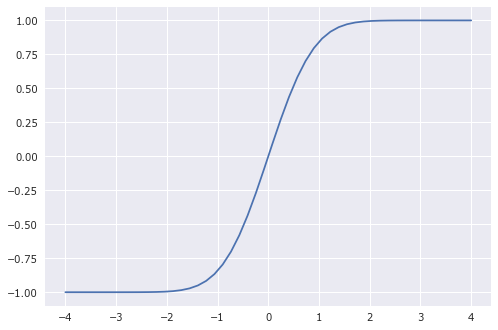

In [451]:
xx = linspace(-4, 4)
plot(xx, scipy.special.erf(xx));

## random и статистика

In [2]:
import random
import numpy

In [39]:
print ' '.join([name for name in dir(random) if not name.startswith('_')])

BPF LOG4 NV_MAGICCONST RECIP_BPF Random SG_MAGICCONST SystemRandom TWOPI WichmannHill betavariate choice division expovariate gammavariate gauss getrandbits getstate jumpahead lognormvariate normalvariate paretovariate randint random randrange sample seed setstate shuffle triangular uniform vonmisesvariate weibullvariate


Чтобы последовательность случайных чисел повторялась между запусками блокнота, что важно для reproducible research, следует всегда указывать seed источника случайных чисел. Python использует Mersenne twister.

In [40]:
random.seed(0)

In [41]:
random.random()

0.8444218515250481

In [42]:
dice = [random.randint(1, 6) for i in range(10)]
dice

[5, 3, 2, 4, 3, 5, 2, 3, 4, 6]

либо

In [9]:
numpy.random.seed(0)
print numpy.random.randint(1, 6, (10,))
print numpy.random.randn(5)
print numpy.random.random(5)
a = [1, 2, 3, 4, 5]
numpy.random.shuffle(a)
print a

[5 1 4 4 4 2 4 3 5 1]
[-0.10321885  0.4105985   0.14404357  1.45427351  0.76103773]
[ 0.07103606  0.0871293   0.0202184   0.83261985  0.77815675]
[4, 2, 5, 3, 1]


Не используйте ГПСЧ в криптографических целях.

In [43]:
print sum(dice), min(dice), max(dice), numpy.mean(dice), numpy.median(dice), numpy.std(dice), numpy.var(dice)

37 2 6 3.7 3.5 1.26885775404 1.61


In [46]:
print [numpy.percentile(dice, k) for k in range(10, 100, 10)]

[2.0, 2.8000000000000003, 3.0, 3.0, 3.5, 4.0, 4.2999999999999998, 5.0, 5.0999999999999996]


In [49]:
mean_square_deviation = numpy.mean((dice - numpy.mean(dice)) ** 2)
print mean_square_deviation

print numpy.std(dice) # Смещенная оценка
print numpy.sqrt(mean_square_deviation)

print numpy.std(dice, ddof=1) # Несмещенная оценка /(n-ddof)
print numpy.sqrt(mean_square_deviation * len(dice) / (len(dice) - 1))

1.61
1.26885775404
1.26885775404
1.33749350985
1.33749350985


## numpy

### Задание массивов

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Numpy предоставляет довольно щедрый набор способов генерации n-мерных массивов

In [3]:
U = array([[1,2,3],[4,5,6]])
print U
print U.shape, U.dtype
print U[1,2]
print U[:,1]

[[1 2 3]
 [4 5 6]]
(2L, 3L) int32
6
[2 5]


In [11]:
print zeros(5, dtype=int)
print zeros((2,3), 'i')
print ones((2,3))
print eye(4, 4)
print identity(3)
print diag([1, 2, 3]).astype(complex)

[0 0 0 0 0]
[[0 0 0]
 [0 0 0]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  2.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  3.+0.j]]


In [6]:
print arange(5), arange(3, 11, 2)
print linspace(0, 1) # По умолчанию 50 чисел
print logspace(0, 2, num=9)

[0 1 2 3 4] [3 5 7 9]
[ 0.          0.02040816  0.04081633  0.06122449  0.08163265  0.10204082
  0.12244898  0.14285714  0.16326531  0.18367347  0.20408163  0.2244898
  0.24489796  0.26530612  0.28571429  0.30612245  0.32653061  0.34693878
  0.36734694  0.3877551   0.40816327  0.42857143  0.44897959  0.46938776
  0.48979592  0.51020408  0.53061224  0.55102041  0.57142857  0.59183673
  0.6122449   0.63265306  0.65306122  0.67346939  0.69387755  0.71428571
  0.73469388  0.75510204  0.7755102   0.79591837  0.81632653  0.83673469
  0.85714286  0.87755102  0.89795918  0.91836735  0.93877551  0.95918367
  0.97959184  1.        ]
[   1.            1.77827941    3.16227766    5.62341325   10.           17.7827941
   31.6227766    56.23413252  100.        ]


Больше возможностей задавать массивы

In [309]:
arr = [1,2,3]
repeat(arr, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [228]:
tile(arr, 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [229]:
tile(arr, (2, 3))

array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3]])

In [247]:
a = array([1,2,3,4])
b = array([1,4,9,16])
c = array([1,8,27,64])

In [256]:
c_[a, b, c]

array([[ 1,  1,  1],
       [ 2,  4,  8],
       [ 3,  9, 27],
       [ 4, 16, 64]])

In [241]:
r_[a, b, c]

array([[ 1,  2,  3,  4],
       [ 1,  4,  9, 16],
       [ 1,  8, 27, 64]])

In [16]:
a = fromfunction(lambda i,j: i*j, (10,10), dtype=int)
a

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

### Экспорт-импорт

Массивы numpy можно сохранять в:
* текстовый формат (числа, разделенные пробелами) `numpy.savetxt`;
* в бинарный формат, где после заголовка данные идут в порядке как в памяти `numpy.save` (расширение `.npy`);
* в бинарный формат, но внутри zip-архива `numpy.savez` или `numpy.savez_compressed`, если нужно сжатие (расширение `.npz`). Этот вариант позволяет сохранить несколько массивов в один файл.

In [62]:
numpy.savetxt('numpy.txt', a)
numpy.save('numpy', a)
numpy.savez('numpy', arr=a)
numpy.savez_compressed('numpy_compressed', arr=a)

In [63]:
import glob
glob.glob('numpy*')

['numpy.npy', 'numpy.npz', 'numpy.txt', 'numpy_compressed.npz']

In [65]:
print numpy.loadtxt('numpy.txt').shape
print numpy.load('numpy.npy').shape
print numpy.load('numpy.npz')['arr'].shape
print numpy.load('numpy_compressed.npz')['arr'].shape

(10L, 10L)
(10L, 10L)
(10L, 10L)
(10L, 10L)


### Арифметика, индексирование, условия

Библиотеки `numpy` и `scipy` переопределяют многие математические функции и операторы, чтобы они действовали поэлементно, и в значительной мере дублируют друг друга. Код с использованием векторных операций почти всегда тысячекратно быстрее, чем проходы циклами, и приближается по быстродействию к нативным языкам, поэтому нужно использовать их всегда, когда это только возможно.

In [65]:
M = array([[0,1],[3,4]])
print M
print M.T
print M * 5.5
print sqrt(M)
print M + M

[[0 1]
 [3 4]]
[[0 3]
 [1 4]]
[[  0.    5.5]
 [ 16.5  22. ]]
[[ 0.          1.        ]
 [ 1.73205081  2.        ]]
[[0 2]
 [6 8]]


Слайсы

In [110]:
a = zeros((7,7), int)
a[1:-1, 1:-1] = 1
a[2:-2, 2:-2] = 2
a[3,3] = 3
print a
print
a[(a == 0) | (a == 3)] = 5
print a

[[0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 2 2 2 1 0]
 [0 1 2 3 2 1 0]
 [0 1 2 2 2 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]]

[[5 5 5 5 5 5 5]
 [5 1 1 1 1 1 5]
 [5 1 2 2 2 1 5]
 [5 1 2 5 2 1 5]
 [5 1 2 2 2 1 5]
 [5 1 1 1 1 1 5]
 [5 5 5 5 5 5 5]]


Индексирование списками

In [169]:
a = zeros((7,7), int)
a[[0,1,0,1], [1,0,-2,-1]] = 42
print a

[[ 0 42  0  0  0 42  0]
 [42  0  0  0  0  0 42]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


Булево индексирование, индексы True в массиве

In [55]:
a = arange(1, 8)
print a
mask = (a % 2 == 0) | (a == 5)
print mask
print a[mask]
print where(mask)

[1 2 3 4 5 6 7]
[False  True False  True  True  True False]
[2 4 5 6]
(array([1, 3, 4, 5], dtype=int64),)


In [56]:
all(mask), any(mask)

(False, True)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
take([100, 101, 102, 103], [1, 1, 1, 2, 3])

array([101, 101, 101, 102, 103])

In [5]:
arr = array([100, 101, 102, 103])
put(arr, [0, 3], [666, 667, 668])
arr

array([666, 101, 102, 667])

In [105]:
in1d(a, [2, 3, 5, 7]) # [elem in B for elem in A]

array([False,  True,  True, False,  True, False,  True], dtype=bool)

Выбор (под)массива по условию или по индексу

In [58]:
which = array([1, 0, 1, 2])

In [59]:
where(which == 0, [-2,-3,-4,-5], [6,7,8,9]) # [B[i] if A[i] else C[i] for i in enumerate(A)]

array([ 6, -3,  8,  9])

In [61]:
choose(which, [[-2,-3,-4,-5], [6,7,8,9], [100,101,102,103]]) # [B[elem] for elem in A]

array([  6,  -3,   8, 103])

### Изменение формы

In [121]:
a = array([1,2,3,4])
a

array([1, 2, 3, 4])

In [122]:
a2d = a[newaxis,:]
a2d

array([[1, 2, 3, 4]])

In [123]:
a2d.T

array([[1],
       [2],
       [3],
       [4]])

In [121]:
a = array([[1,2,3,4],[5,6,7,8]])
print a
print a.reshape((4, -1))
print a.ravel()
print a[newaxis, :, :]
print a.swapaxes(0, 1)
print a.transpose(1, 0)

[[1 2 3 4]
 [5 6 7 8]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[1 2 3 4 5 6 7 8]
[[[1 2 3 4]
  [5 6 7 8]]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]


### Агрегирующие функции

Агрегирующие функции из состава `numpy` убирают одну или несколько осей (номера исчезающих осей задаются аргументом `axis`) в многомерном массиве

In [ ]:
from numpy import array, diag
M = array([[0,1],[3,4]])

In [174]:
print M
print 'max =', amax(M) # или numpy.max
print 'argmax = flat', argmax(M), 'indices', unravel_index(argmax(M), M.shape) 
print amax(M, axis=0)
print amax(M, axis=1)
print sum(M)
print sum(M, axis=0)
print sum(M, axis=1)

[[0 1]
 [3 4]]
max = 4
argmax = flat 3 indices (1, 1)
[3 4]
[1 4]
8
[3 5]
[1 7]


In [2]:
clip(arange(10), a_min=3, a_max=7)

array([3, 3, 3, 3, 4, 5, 6, 7, 7, 7])

In [154]:
diff([1, 2, 3, 4, 6])

array([1, 1, 1, 2])

In [102]:
cumsum([1, 2, 3, 4, 6])

array([ 1,  3,  6, 10, 16])

### Операции, связанные с сортировкой

In [128]:
argsort(array([1,2,1,8]))

array([0, 2, 1, 3], dtype=int64)

In [53]:
unique(list('coordination'))

array(['a', 'c', 'd', 'i', 'n', 'o', 'r', 't'],
      dtype='|S1')

In [52]:
unique(list('coordination'), return_inverse=True)

(array(['a', 'c', 'd', 'i', 'n', 'o', 'r', 't'],
       dtype='|S1'), array([1, 5, 5, 6, 2, 3, 4, 0, 7, 3, 5, 4], dtype=int64))

In [69]:
searchsorted(list('acdinort'), list('north'))

array([4, 5, 6, 7, 3], dtype=int64)

Первый шаг сортировки подсчетом

In [125]:
bincount([0, 0, 1, 1, 1, 2, 2, 2, 2])

array([2, 3, 4], dtype=int64)

### Матричные операции

Cкалярное и векторное умножение векторов, поэлементное умножение матриц, матричное умножение

In [85]:
print dot([3,4], [3,4])
print cross([1,2,3], [4,5,6])
print norm([3,4])
print array([[1,2],[3,4]]) * array([[4,3],[2,1]])
print dot(diag([1,2,3]), ones((3, 3)))

25
[-3  6 -3]
5.0
[[4 6]
 [6 4]]
[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]]


In [378]:
print inv(M)
print pinv(M) # Псевдообратная Мура-Пенроуза
print dot(inv(M), M)

[[-1.33333333  0.33333333]
 [ 1.          0.        ]]
[[ -1.33333333e+00   3.33333333e-01]
 [  1.00000000e+00   6.64621824e-17]]
[[ 1.  0.]
 [ 0.  1.]]


Определитель

In [67]:
A = matrix([map(int, line.split()) for line in '''\
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0
1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0
1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0
1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
'''.splitlines()])
print A

print det(A * A.T)

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
 [0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0]
 [1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
 [0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]]
107572.0


Решение матриц

In [47]:
solve([[1, 1], [1, 2]], [3, 4])

array([ 2.,  1.])

Собственные числа и соответствующие собственные вектора

In [323]:
eigvals(M)

array([-0.64575131,  4.64575131])

In [152]:
eig(M)

(array([-0.64575131,  4.64575131]), array([[-0.84007078, -0.21043072],
        [ 0.54247681, -0.97760877]]))

Матричная экспонента

In [379]:
exp(M) # поэлементная

array([[  1.        ,   2.71828183],
       [ 20.08553692,  54.59815003]])

In [381]:
scipy.linalg.expm(M) # матричная

array([[ 13.16926161,  19.5818311 ],
       [ 58.7454933 ,  91.49658601]])

### Тензорные операции с einsum

Произвольные тензорные свертки возможны с использованием хитрого синтаксиса форматной строки `numpy.einsum`. Сначала через запятую перечисляется столько же групп букв, сколько аргументов, кроме строки, у `einsum`. Аргументы с индексами из соответствующих групп (`...` заменяет недостающие до размерности аргумента) перемножаются. Для букв, которые повторяются, слева от произведения ставится $\sum$ по этим индексам. Уникальные буквы становятся размерностями результата. Если в строке `einsum` в конце есть `->` с группой букв, то суммирование проводится по буквам, которых там нет, а индексы результата расставляются согласно их порядку.

In [29]:
A = array([[1,2],[3,4]])
B = array([[2,1],[1,2]])
print A
print B

[[1 2]
 [3 4]]
[[2 1]
 [1 2]]


In [33]:
einsum('ii', A)

5

$R = \sum_i A_{ii} = \mathrm{tr} A = 1 + 4 = 5$

In [43]:
einsum('ii,ii', A, B)

10

$R = \sum_i A_{ii} B_{ii} = 1 \times 2 + 4 \times 2 = 10$

In [31]:
einsum('ij,ij', A, B)

15

$R = \sum_{i, j} A_{ij} B_{ij} = 1 \times 2 + 2 \times 1 + 3 \times 1 + 4 \times 2 = 15$

In [41]:
einsum('ij,ij->ij', A, B)

array([[2, 2],
       [3, 8]])

$R_{ij} = A_{ij} B_{ij} \Leftrightarrow R = A \odot B$

In [13]:
dot(A, B)

array([[ 4,  5],
       [10, 11]])

In [19]:
einsum('ik,kj', A, B)

array([[ 4,  5],
       [10, 11]])

$R_{ij} = \sum_{k} A_{ik} B_{kj} \Leftrightarrow R = AB$

In [20]:
einsum('ij,kl', A, B)

array([[[[2, 1],
         [1, 2]],

        [[4, 2],
         [2, 4]]],


       [[[6, 3],
         [3, 6]],

        [[8, 4],
         [4, 8]]]])

$R_{ijkl} = A_{ij} B_{kl} \Leftrightarrow R = A \otimes B$

In [35]:
dot(A, A.T)

array([[ 5, 11],
       [11, 25]])

In [34]:
einsum('ik,jk', A, A)

array([[ 5, 11],
       [11, 25]])

$R_{ij} = \sum_k A_{ik} A_{jk} \Leftrightarrow R = A A^T$

In [36]:
dot(A.T, A)

array([[10, 14],
       [14, 20]])

In [40]:
einsum('ki,kj->k', A, A)

array([ 9, 49])

$R_k = \sum_{i,j} A_{ki} A_{kj} = \sum_i A_{ki} \sum_j A_{kj} = \left( \sum_i A_{ki} \right)^2 = [(1+2)^2, (3+4)^2] = [9, 49]$

todo poly, polyval, roots, polymul, polydiv

### Подгонометрия

Метод наименьших квадратов, МНК. Третий параметр отвечает за степень подгоняемого полинома. Если нужен R-value или p-value для линейной регрессии, можно использовать `scipy.stats.linregress`.

y = 2.067290 * x + 2.823364
LinregressResult(slope=2.0672897196261681, intercept=2.8233644859813083, rvalue=0.99808601031951683, pvalue=0.0019139896804831751, stderr=0.090572272445500743)


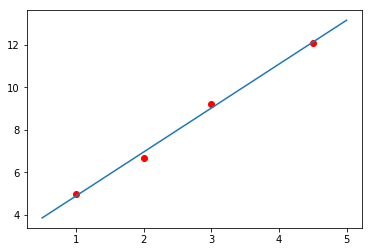

In [119]:
x = [1,2,3,4.5]
y = [5,6.7,9.2,12.1]
a, b = polyfit(x, y, 1)
print 'y = %f * x + %f' % (a, b)
print scipy.stats.linregress(x, y)

plot(x, y, 'ro')
xx = linspace(0.5, 5)
plot(xx, a * xx + b); # или plot(xx, polyval([a, b], xx));

Методы оптимизации из `scipy.optimize` могут подогнать произвольную функцию

todo
import scipy.optimize
anneal

In [3]:
import scipy.stats
from scipy.optimize import curve_fit

In [216]:
numpy.random.seed(0)

2.83040880267 -0.52531728019
Should be 2.78 -0.54


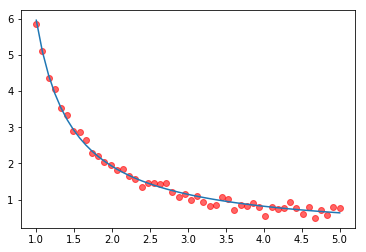

In [5]:
def fn(x, a, b): return a / (x + b)

xx = linspace(1, 5)
yy = 2.78 / (xx - 0.54) + randn(len(xx)) * 0.1

(a, b), _ = curve_fit(fn, xx, yy)
print a, b
print 'Should be', 2.78, -0.54

scatter(xx, yy, c='r', alpha=0.6)
plot(xx, fn(xx, a, b));

0.422635888562 -0.573057075764 0.972212416003
Should be 0.398942280401 -0.5 1.02


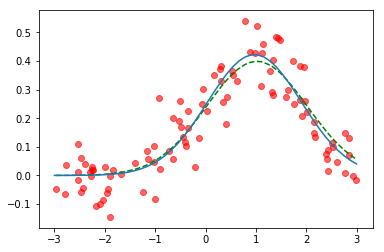

In [10]:
def fn(x, a, b, c):
    return a * exp(b * (x - c) ** 2)

xx = array(sorted(rand(100) * 6 - 3))
yy = scipy.stats.norm.pdf(xx - 1.02) + randn(len(xx)) * 0.07

(a, b, c), _ = curve_fit(fn, xx, yy, maxfev=5000, bounds=(-5, 5))
print a, b, c
print 'Should be', 1/sqrt(2*pi), -0.5, 1.02
plot(xx, fn(xx, 0.398942280401, -0.5, 1.02), 'g--')

scatter(xx, yy, c='r', alpha=0.6)
xx = linspace(-3, 3)
plot(xx, fn(xx, a, b, c));

### Интерполяция линейная и полиномом Лагранжа

[ 0.5  -3.75  8.75 -5.5 ]


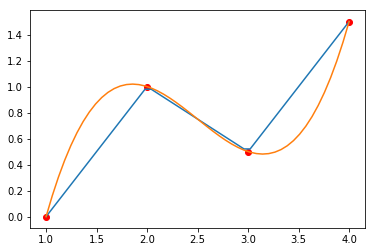

In [120]:
import scipy.interpolate

xs = [1, 2, 3, 4]
ys = [0, 1, 0.5, 1.5]
xx = linspace(1, 4)

scatter(xs, ys, c='r')
plot(xx, interp(xx, xs, ys));

poly = scipy.interpolate.lagrange(xs, ys)
print poly.coeffs
plot(xx, poly(xx));

### Численное интегрирование

In [320]:
val, abserr = scipy.integrate.quad(lambda x: exp(-x ** 2), -Inf, Inf)
print val, abserr

import sympy
from sympy import var, oo
x = var('x')
print 'Should be', sympy.integrate(sympy.exp(-x ** 2), (x, -oo, oo)), '=', sqrt(pi)

1.77245385091 1.42026367818e-08
Should be sqrt(pi) = 1.77245385091


todo ode, odeint

### Дискретное преобразование Фурье

Преобразование Фурье. Сигнал содержит шум и две синусоидальные компоненты на 7 и 30 Гц. Частота дискретизации (число отсчетов в секунду) `Fs` = 100 Гц. БПФ показывает частоты до `Fs/2`, горизонтальное разрешение спектрограммы `(npts - NFFT) / (NFFT - noverlap) + 1`, вертикальное разрешение `NFFT`, где `NFFT` — ширина окна БПФ, а `noverlap` — ширина их пересечений.

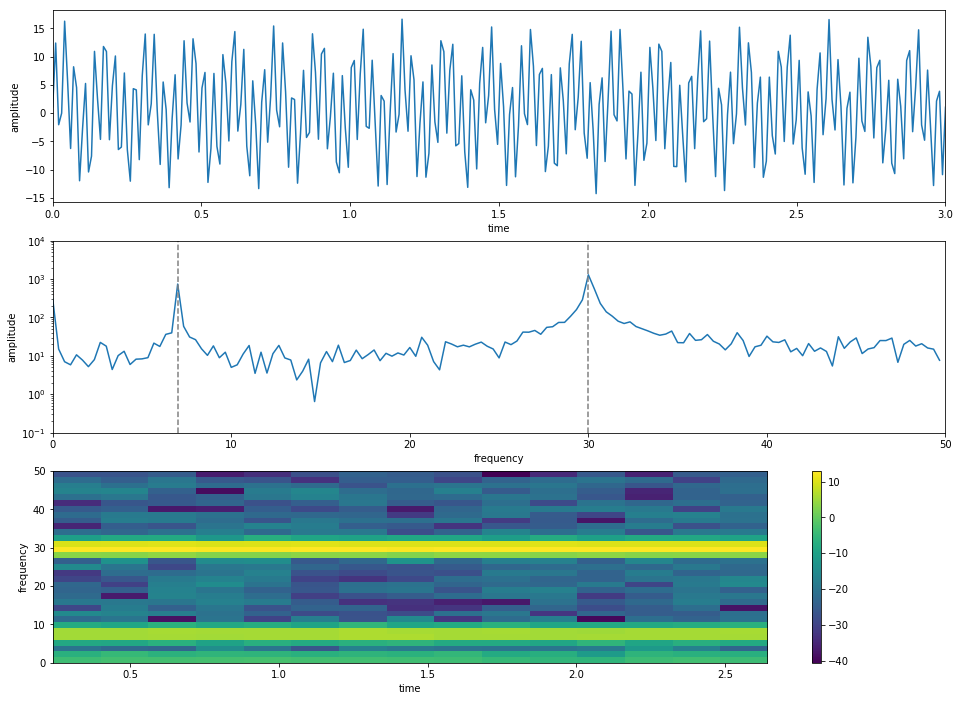

In [102]:
from scipy.fftpack import fft, fftfreq

duration = 3
Fs = 100
npts = Fs * duration
t = linspace(0, duration, npts)
signal = 10 * sin(2 * pi * 30.0 * t) + 5 * sin(2 * pi * 7.0 * t) + 2 * rand(npts)

FFT = abs(fft(signal))
freqs = fftfreq(npts, 1./Fs)


figure(figsize=(16,12))
subplot(311)
xlim([0, 3])
xlabel('time')
ylabel('amplitude')
plot(t, signal)

subplot(312)
xlim([0, 50])
ylim([0, 100])
ylim([0.1, 1e4])
yscale('log')
xlabel('frequency')
ylabel('amplitude')
plot(freqs[:npts/2], FFT[:npts/2]);
axvline(x=7.0, ls='--', c='gray')
axvline(x=30.0, ls='--', c='gray')

subplot(313)
xlabel('time')
ylabel('frequency')
specgram(signal, 64, Fs=Fs, noverlap=48)
colorbar();

todo Какой-нибудь сеточный метод моделирования

### Матстат

In [105]:
import scipy.stats

In [163]:
distrs = [k[:-4] for k, v in scipy.stats.distributions.__dict__.items() if type(v) == type and k.endswith('_gen')]
print len(distrs)
print ' '.join(sorted(distrs))

105
alpha anglit arcsine argus bernoulli beta betaprime binom boltzmann bradford burr burr12 cauchy chi chi2 cosine dgamma dlaplace dweibull erlang expon exponnorm exponpow exponweib f fatiguelife fisk foldcauchy foldnorm frechet_l frechet_r gamma gausshyper genexpon genextreme gengamma genhalflogistic genlogistic gennorm genpareto geom gilbrat gompertz gumbel_l gumbel_r halfcauchy halfgennorm halflogistic halfnorm hypergeom hypsecant invgamma invgauss invweibull johnsonsb johnsonsu kappa3 kappa4 ksone kstwobign laplace levy levy_l levy_stable loggamma logistic loglaplace lognorm logser lomax maxwell mielke nakagami nbinom ncf nct ncx2 norm pareto pearson3 planck poisson powerlaw powerlognorm powernorm randint rayleigh rdist recipinvgauss reciprocal rice semicircular skellam skew_norm t trapz triang truncexpon truncnorm tukeylambda uniform vonmises wald wrapcauchy zipf


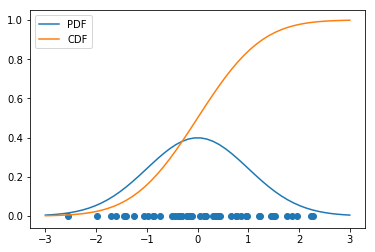

In [106]:
rnd = scipy.stats.norm.rvs(size=(50,), loc=0, scale=1, random_state=0)

xx = linspace(-3, 3)
scatter(rnd, [0] * 50);
plot(xx, scipy.stats.norm.pdf(xx), label='PDF');
plot(xx, scipy.stats.norm.cdf(xx), label='CDF');
legend();

todo A.flatten() # make copy

todo 

    проверки статистических гипотез

    from scipy.stats import gaussian_kde, rv_continuous, rv_discrete
    from scipy.stats.tests import test_discrete_basic
    pearsonr
    spearmanr

    scipy.stats.entropy(pk, qk=None, base=None)
    Calculate the entropy of a distribution for given probability values.
    If only probabilities pk are given, the entropy is calculated as S = -sum(pk * log(pk), axis=0).
    If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=0).
    This routine will normalize pk and qk if they don’t sum to 1.

    scipy.stats.ttest_ind(a, b, axis=0, equal_var=True)
    The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

    scipy.stats.ttest_1samp(a, popmean, axis=0)[source]
    Calculates the T-test for the mean of ONE group of scores.
    This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

    scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')[source]
    Perform the Kolmogorov-Smirnov test for goodness of fit.
    This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). Under the null hypothesis the two distributions are identical, G(x)=F(x). The alternative hypothesis can be either ‘two-sided’ (default), ‘less’ or ‘greater’. The KS test is only valid for continuous distributions.

    scipy.stats.ranksums(x, y)[source]
    Compute the Wilcoxon rank-sum statistic for two samples.
    The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

    corrcoef(x)
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `m` represents a variable, and each column a single
        observation of all those variables.
    cov

todo

    from scipy import signal, weave
    from scipy.spatial.distance import cosine, pdist, cdist, squareform

todo

    from scipy.sparse import *, csr_matrix
    def show_sparse_bytes(a):
        print((a.data.nbytes, a.indptr.nbytes, a.indices.nbytes), a.data.nbytes + a.indptr.nbytes + a.indices.nbytes)

todo численная геометрия (shapely? CGAL?)

todo scipy.spatial: Delaunay ConvexHull Voronoi

todo https://docs.scipy.org/doc/scipy/reference/constants.html